In [1]:
from pycolator import *

idCol = 'SpecId'
scoreCol = 'NuXL:score'
excluded = ['SpecId', 'Label', 'ScanNr', 'Peptide', 'Proteins', 'FDR', 'q-val', 'Rank', 'temp_score', 'percolator_score']

dSlow = readAndProcess('../Data/1-AChernev_080219_dir_HeLa_cyt_UCGA_slow.tsv', idCol, scoreCol)

file read
strings converted to numbers
q-values estimated
ranks computed


Training in iteration 1 with split 1/3 starts!
Training in iteration 1 with split 2/3 starts!
Training in iteration 1 with split 3/3 starts!
Iteration 1/10 done!
Training in iteration 2 with split 1/3 starts!
Training in iteration 2 with split 2/3 starts!
Training in iteration 2 with split 3/3 starts!
Iteration 2/10 done!
Training in iteration 3 with split 1/3 starts!
Training in iteration 3 with split 2/3 starts!
Training in iteration 3 with split 3/3 starts!
Iteration 3/10 done!
Training in iteration 4 with split 1/3 starts!
Training in iteration 4 with split 2/3 starts!
Training in iteration 4 with split 3/3 starts!
Iteration 4/10 done!
Training in iteration 5 with split 1/3 starts!
Training in iteration 5 with split 2/3 starts!
Training in iteration 5 with split 3/3 starts!
Iteration 5/10 done!
Training in iteration 6 with split 1/3 starts!
Training in iteration 6 with split 2/3 starts!
Training in iteration 6 with split 3/3 starts!
Iteration 6/10 done!
Training in iteration 7 with

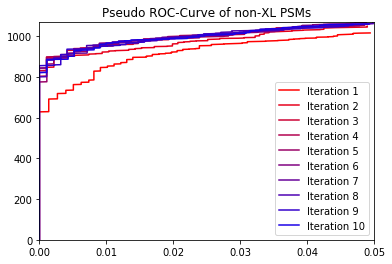

AUC of last iteration: 48.98181959270034


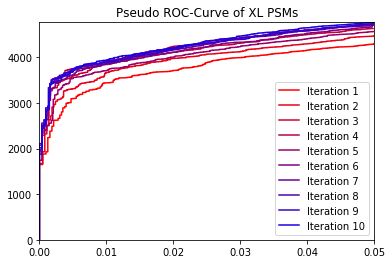

AUC of last iteration: 212.26354401618036


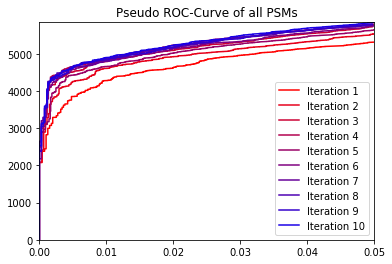

AUC of last iteration: 262.09537879601356


In [2]:
p = percolator(dSlow, idCol, excluded, plotEveryIter = True, plotSaveName = '../results/percolator_acv_{}.png')

263.8022211448814

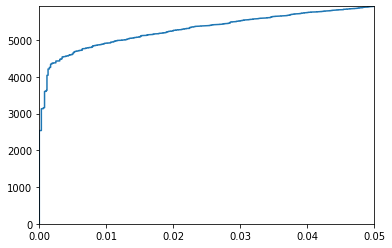

In [3]:
pseudoROC(p)

AUC for Non-cross-linked PSMs: 47.967394573571305
AUC for Cross-linked PSMs: 215.42559775905636


[47.967394573571305, 215.42559775905636]

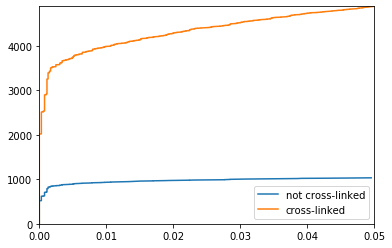

In [4]:
evalXL(p)

AUC for Non-cross-linked PSMs: 44.710425992598296
AUC for Cross-linked PSMs: 169.22464575617875


[44.710425992598296, 169.22464575617875]

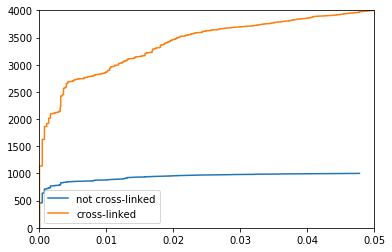

In [5]:
evalXL(dSlow)